# Machine Learning Lab - Hackathon

**Summer Term 2021**

- Julian Stier <julian.stier@uni-passau.de>
- Sahib Julka <sahib.julka@uni-passau.de>
- [StudIP Machine Learning Lab](https://studip.uni-passau.de/studip/dispatch.php/course/scm?cid=42befdd6822ee2029b26fa475cd02f60)
- [FimGIT repositories](https://fimgit.fim.uni-passau.de/groups/padas/21ss-mllab/)

**General Remarks**
- You have time from 09:00 AM until 03:00 PM to work on the hackathon task.
- Go through the notebook, answer questions, solve described tasks and fill out empty spaces or add cells based on your creativity.
- Re-use previous implementations (of your own!) by either importing according python modules or copying it into the notebook.
- Your overall git repository acts as the official submission. Put the hackathon notebook also into the git repository, alongside with any previous notebooks or python implementations you already uploaded.
- If one of your implementation required for this notebook has not been working previously, you can now work on that specifically and try to solve it within the given time frame.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle

# Step I: Prepare Your Data

- Download the two datasets.
- Read it into memory.
- Understand the feature shape and number of targets.
- Split both datasets into three fixed train-validation-test sets with own chosen proportions. You can e.g. use 80% of the data for training, 10% of the data for the validation set and 10% for the test set. Make sure you shuffle the data in before once.

### UCI Dataset: Abalone
> https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/

In [2]:
!wget -P ./data/abalone/ https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
!wget -P ./data/abalone/ https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names

zsh:1: command not found: wget
zsh:1: command not found: wget


In [3]:
#!cat datasets/abalone/abalone.names

In [4]:
col_names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
df = pd.read_csv("datasets/abalone/abalone.data", header=None, names=col_names)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.shape

(4177, 9)

In [6]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

__Convert target value to numerical form__

In [7]:
df["Sex"] = df["Sex"].astype('category')

In [8]:
df['Sex'] = df['Sex'].cat.codes

In [9]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


__shuffle datasets__

In [10]:
df = df.sample(frac = 1).reset_index(drop=True)

In [11]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.265,0.200,0.065,0.0840,0.0340,0.0105,0.030,7
1,2,0.380,0.285,0.100,0.2665,0.1150,0.0610,0.075,11
2,2,0.545,0.410,0.120,0.7930,0.4340,0.1405,0.190,9
3,2,0.615,0.475,0.150,1.0375,0.4760,0.2325,0.283,9
4,1,0.575,0.450,0.135,0.8245,0.3375,0.2115,0.239,11


In [12]:
df['Sex'].unique()

array([2, 1, 0], dtype=int8)

__split data to train validation and test__

In [13]:
train = df[:3340]
valid = df[3340:3760]
test = df[3760:]

__Convert into numpy array__

In [14]:
uci_features_train = np.array(train.drop(['Sex'],1))
train_label = train[['Sex']]
uci_labels_train = np.array(np.array(train_label, dtype=None).reshape(-1))

uci_features_valid = np.array(valid.drop(['Sex'],1))
valid_label = valid[['Sex']]
uci_labels_valid = np.array(np.array(valid_label, dtype=None).reshape(-1))

uci_features_test = np.array(test.drop(['Sex'],1))
test_label = test[['Sex']]
uci_labels_test = np.array(np.array(test_label, dtype=None).reshape(-1))

__data in numpy array__

In [15]:
uci_features_train

array([[2.650e-01, 2.000e-01, 6.500e-02, ..., 1.050e-02, 3.000e-02,
        7.000e+00],
       [3.800e-01, 2.850e-01, 1.000e-01, ..., 6.100e-02, 7.500e-02,
        1.100e+01],
       [5.450e-01, 4.100e-01, 1.200e-01, ..., 1.405e-01, 1.900e-01,
        9.000e+00],
       ...,
       [3.600e-01, 3.000e-01, 8.500e-02, ..., 6.400e-02, 7.450e-02,
        7.000e+00],
       [4.500e-01, 3.500e-01, 1.450e-01, ..., 1.000e-01, 1.655e-01,
        1.500e+01],
       [5.600e-01, 4.450e-01, 1.550e-01, ..., 2.090e-01, 2.750e-01,
        1.600e+01]])

In [16]:
uci_features_train[:,:3]

array([[0.265, 0.2  , 0.065],
       [0.38 , 0.285, 0.1  ],
       [0.545, 0.41 , 0.12 ],
       ...,
       [0.36 , 0.3  , 0.085],
       [0.45 , 0.35 , 0.145],
       [0.56 , 0.445, 0.155]])

In [17]:
uci_labels_train

array([2, 2, 2, ..., 1, 1, 1], dtype=int8)

### Fashion-MNIST

In [18]:
!wget -P ./data/fashion/raw/ https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-images-idx3-ubyte.gz
!wget -P ./data/fashion/raw/ https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-labels-idx1-ubyte.gz

zsh:1: command not found: wget
zsh:1: command not found: wget


In [19]:
fmnist_features_train = np.array([])
fmnist_labels_train = np.array([])

fmnist_features_valid = np.array([])
fmnist_labels_valid = np.array([])

fmnist_features_test = np.array([])
fmnist_labels_test = np.array([])

# Step II: Choose a Baseline Classifier

* Choose a baseline classifier - except the neural network classifier - you have been working with over the semester and let it learn based on the **small** dataset
* Provide some error measure or indicator whether your classifier learned, e.g. loss over multiple steps or the number of correctly classified samples on the training set or similar

```python
model_baseline = YourAlgorithm()
model_baseline.learn(uci_features_train, uci_labels_train)
```

In [18]:
from mllab.SimpleNN import SimpleNN

In [19]:
nn = SimpleNN()
nn.add(activation="tanh",input_dim=8, hidden_dim=16, output_dim=3, print_loss=True)
nn.train(uci_features_train, uci_labels_train, epoches=2000, reg_value=0.01, epsilon=0.01, batch_size=32)

Loss after iteration 0: 3.473898
Loss after iteration 0: 1.384530
Loss after iteration 0: 3.037768
Loss after iteration 0: 2.230842
Loss after iteration 0: 1.318337
Loss after iteration 0: 1.218905
Loss after iteration 0: 1.779133
Loss after iteration 0: 3.053287
Loss after iteration 0: 1.530960
Loss after iteration 0: 1.147774
Loss after iteration 0: 1.046585
Loss after iteration 0: 1.146571
Loss after iteration 0: 1.214444
Loss after iteration 0: 1.176012
Loss after iteration 0: 1.161160
Loss after iteration 0: 1.184322
Loss after iteration 0: 1.149983
Loss after iteration 0: 1.159964
Loss after iteration 0: 1.113246
Loss after iteration 0: 1.105006
Loss after iteration 0: 1.162852
Loss after iteration 0: 1.181030
Loss after iteration 0: 1.156134
Loss after iteration 0: 1.188966
Loss after iteration 0: 1.237562
Loss after iteration 0: 1.172098
Loss after iteration 0: 1.235979
Loss after iteration 0: 1.109781
Loss after iteration 0: 1.102034
Loss after iteration 0: 1.089430
Loss after

In [20]:
pred_y = nn.infer(uci_features_test)

In [21]:
from sklearn import metrics
print('Accuracy: %2.2f %%' % (100. * metrics.accuracy_score(uci_labels_test, pred_y)))

Accuracy: 53.00 %


In [17]:
from mllab.Hackathon import SimpleNN

In [ ]:
nn = SimpleNN()
nn.add(activation="tanh",input_dim=8, hidden_dim=16, output_dim=3, print_loss=True)

In [19]:
nn.train(uci_features_train, uci_labels_train, epoches=2000, reg_value=0.01, epsilon=0.01, batch_size=32)

Loss after iteration 0: 1.548827
Loss after iteration 0: 1.152364
Loss after iteration 0: 1.719223
Loss after iteration 0: 1.150926
Loss after iteration 0: 1.374045
Loss after iteration 0: 1.267933
Loss after iteration 0: 1.094693
Loss after iteration 0: 1.093733
Loss after iteration 0: 1.079807
Loss after iteration 0: 1.221232
Loss after iteration 0: 1.196634
Loss after iteration 0: 1.180083
Loss after iteration 0: 1.082463
Loss after iteration 0: 1.128235
Loss after iteration 0: 1.114035
Loss after iteration 0: 1.126828
Loss after iteration 0: 1.134093
Loss after iteration 0: 1.109282
Loss after iteration 0: 1.095049
Loss after iteration 0: 1.110274
Loss after iteration 0: 1.236029
Loss after iteration 0: 1.146087
Loss after iteration 0: 1.207606
Loss after iteration 0: 1.052651
Loss after iteration 0: 1.180192
Loss after iteration 0: 1.189899
Loss after iteration 0: 1.055681
Loss after iteration 0: 1.095291
Loss after iteration 0: 1.095548
Loss after iteration 0: 1.086695
Loss after

In [20]:
pred_y = nn.infer(uci_features_test)

In [21]:
from sklearn import metrics
print('Accuracy: %2.2f %%' % (100. * metrics.accuracy_score(uci_labels_test, pred_y)))

Accuracy: 50.36 %


# Step III: Provide Evaluation Metrics for the Classifier Interface

* Given the class interface for machine learning models, use the predicted target from the result of an model.infer()-invocation to calculate precision, recall and f1-score given the actual test-set targets.
* Do not use scikit-learn or similar libraries; but you can orientate on such interfaces or implementations.
* Note, that a model can return two or multiple classes based on the problem it learned.

```python
baseline_predicted = model_baseline.infer(features_test)
```

> https://en.wikipedia.org/wiki/Precision_and_recall

$precision = \frac{\text{true positives}}{\text{true positives} + \text{false positives}}$

$recall = \frac{\text{true positives}}{\text{true positives} + \text{false negatives}}$

__Precision, Recall & F1 score__

In [31]:
def confusion_matrix(testy, predy):
    cls = np.unique(testy)
    mat = np.zeros((len(testy), len(predy)))
    for i in range(len(cls)):
        for j in range(len(cls)):
            print(testy)
            print(cls[i])
            mat[i, j] = np.sum((testy == cls[i]) & (predy == cls[j]))
    return mat

In [36]:
confusion = confusion_matrix(testy, predy)

In [99]:
confusion = np.array(confusion)

In [100]:
confusion

array([[  0.,   7., 135., ...,   0.,   0.,   0.],
       [  0.,  79.,  41., ...,   0.,   0.,   0.],
       [  0.,  24., 131., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

__True Positive__
* Sum of all diagonal elements gives true positive

In [84]:
TP = np.trace(confusion)
TP

210.0

__False Positive__
* sum all the columns values
* subtract with the diagonal values
* Remains False positive

In [109]:
col_sum = np.sum(confusion, axis=0)

In [111]:
diag = np.diag(confusion)

In [112]:
FP = col_sum - diag

In [113]:
FP = np.sum(FP)
FP

207.0

__False Negative__
* sum all the rows values
* subtract with the diagonal values
* Remains False negative

In [106]:
row_sum = np.sum(confusion, axis=1)


In [107]:
diag = np.diag(confusion)


In [108]:
FN = row_sum - diag

In [93]:
FN = np.sum(FN)
FN

207.0

__True Negative__

In [94]:
# Overall True negative is zero
TN = 0 

__Calculate TP, FP, FN, TN__

In [114]:
def TF(confusion):
    #True positive
    TP = np.trace(confusion)
    
    #False positive
    col_sum = np.sum(confusion, axis=0)
    diag = np.diag(confusion)
    FP = col_sum - diag
    FP = np.sum(FP)
    
    #false negative
    row_sum = np.sum(confusion, axis=1)
    diag = np.diag(confusion)
    FN = row_sum - diag
    FN = np.sum(FN)
    
    #True negative
    TN = 0
    
    return TP, FP, FN, TN

In [115]:
TP, FP, FN, TN = TF(confusion)

In [122]:
TP, FP, FN, TN

(210.0, 207.0, 207.0, 0)

__Precision__

In [124]:
def Precision(confusion):
    TP, FP, FN, TN = TF(confusion)
    precision = TP / (TP + FP)
    return precision

In [127]:
p = Precision(confusion)
p

0.5035971223021583

__Recall__

In [125]:
def Recall(confusion):
    TP, FP, FN, TN = TF(confusion)
    recall = TP / (TP + FN)
    return recall

In [129]:
r = Recall(confusion)
r

0.5035971223021583

__F1 - score__

In [126]:
def F1_score(confusion):
    precision = Precision(confusion)
    recall = Recall(confusion)
    f1 = 2 * ((precision * recall)/(precision + recall))
    return f1

In [130]:
f1 = F1_score(confusion)
f1

0.5035971223021583

In [36]:
testy = np.array(testy).reshape(-1)
predy = np.array(predy).reshape(-1)

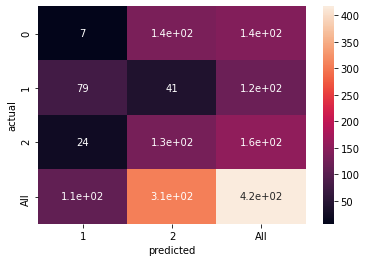

In [40]:
data = {'testy' : testy,
        'predy' : predy}

df = pd.DataFrame(data, columns=['testy', 'predy'])
confusion_matrix = pd.crosstab(df['testy'], df['predy'], rownames=['actual'], colnames=['predicted'], margins=True)

sns.heatmap(confusion_matrix, annot=True)
plt.show()

### Testing your implementation
You can use below vectors as a reference for testing the output of infer() and the target vector of a 10-class-classifier. The *f1_score* method of scikit learn gives you a reference on how the values need to look like. Using the function is of course not a valid solution.

In [ ]:
example_baseline_predicted = np.array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 1, 2, 2, 3, 3, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 5, 6, 7, 8, 9])
example_baseline_test_target = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 1, 3, 3, 3, 3, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 4, 4, 5, 8, 8])

In [132]:
from sklearn.metrics import f1_score
f1_score(testy, predy, average=None)

array([0.        , 0.68695652, 0.56709957])

# Step IV: Experiment (1) Hyperparameter Choice of Baseline Classifier

* Use one fixed train-validation-test split.
* Choose a hyperparameter of your baseline classifier.
* Conduct a grid search to find the best suitable value for it. Let the classifier learn on the training set and use an evaluation metric on the validation set (not the test set!) to find out which hyperparameter value works best for your classifier on the data.

```python
possible_hp_values = np.arange(1, 10, 0.1)
best_hp_value = None
best_f1_score = -np.infty
for hp_value in possible_hp_values:
    # 1. create a baseline classifier object with hp_value specified
    current_model = YourAlgorithm(hyperparam=hp_value)
    
    # 2. learn the classifier on the training set
    current_model.learn(uci_features_train, uci_labels_train)
    
    # 3. evaluate the model on the validation set
    prediction = current_model.infer(uci_features_valid)
    
    f1_score = compute_f1(uci_labels_valid, prediction)
    if f1_score > best_f1_score:
        best_f1_score = f1_score
        best_hp_value = hp_value

print("Found hyperparameter value", best_hp_value)
print("Best f1-score on validation set", best_f1_score)

test_model = YourAlgorithm(hyperparam=best_hp_value)
test_model.learn(uci_features_train, uci_labels_train)
prediction = test_model.infer(uci_features_test)
test_f1_score = compute_f1(uci_labels_test, prediction)
print("F1-Score on test set", test_f1_score)
```

__Batch size is changed__

In [135]:
possible_hp_values = [8,16,32]
best_hp_value = None
best_f1_score = -np.infty
for hp_value in possible_hp_values:
    # 1. create a baseline classifier object with hp_value specified
    nnn = SimpleNN()
    nnn.add(activation="tanh",input_dim=8, hidden_dim=16, output_dim=3, print_loss=True)

    # 2. learn the classifier on the training set
    nnn.train(uci_features_train, uci_labels_train, epoches=2000, reg_value=0.01, epsilon=0.01, batch_size=hp_value)

    # 3. evaluate the model on the validation set
    prediction = nn.infer(uci_features_valid)

    
    confusion = confusion_matrix(testy, predy)
    confusion = np.array(confusion)
    f1_score = F1_score(confusion)
    
    if f1_score > best_f1_score:
        best_f1_score = f1_score
        best_hp_value = hp_value

print("Found hyperparameter value: Batch size", best_hp_value)
print("Best f1-score on validation set", best_f1_score)

Loss after iteration 0: 3.637815
Loss after iteration 0: 1.910060
Loss after iteration 0: 4.183887
Loss after iteration 0: 3.309771
Loss after iteration 0: 3.656066
Loss after iteration 0: 2.397539
Loss after iteration 0: 2.634979
Loss after iteration 0: 2.065391
Loss after iteration 0: 1.488796
Loss after iteration 0: 0.912948
Loss after iteration 0: 1.038738
Loss after iteration 0: 0.770882
Loss after iteration 0: 1.020170
Loss after iteration 0: 1.020745
Loss after iteration 0: 1.097246
Loss after iteration 0: 1.013267
Loss after iteration 0: 1.092186
Loss after iteration 0: 0.635765
Loss after iteration 0: 1.031634
Loss after iteration 0: 1.041832
Loss after iteration 0: 1.080751
Loss after iteration 0: 1.079451
Loss after iteration 0: 1.079147
Loss after iteration 0: 0.998578
Loss after iteration 0: 0.775309
Loss after iteration 0: 0.959161
Loss after iteration 0: 1.088039
Loss after iteration 0: 1.055747
Loss after iteration 0: 0.975239
Loss after iteration 0: 1.105002
Loss after

Loss after iteration 0: 1.069097
Loss after iteration 0: 1.033859
Loss after iteration 0: 0.987290
Loss after iteration 0: 0.992071
Loss after iteration 0: 1.080128
Loss after iteration 0: 1.030221
Loss after iteration 0: 1.083283
Loss after iteration 0: 0.969092
Loss after iteration 0: 1.094777
Loss after iteration 0: 1.025510
Loss after iteration 0: 0.863770
Loss after iteration 0: 1.143908
Loss after iteration 0: 1.028453
Loss after iteration 0: 1.108014
Loss after iteration 0: 0.890174
Loss after iteration 0: 1.116352
Loss after iteration 0: 1.006038
Loss after iteration 0: 1.083451
Loss after iteration 0: 0.991351
Loss after iteration 0: 0.972699
Loss after iteration 0: 1.032585
Loss after iteration 0: 1.078601
Loss after iteration 0: 1.079687
Loss after iteration 0: 0.992328
Loss after iteration 0: 1.102283
Loss after iteration 0: 1.082839
Loss after iteration 0: 1.012309
Loss after iteration 0: 0.882562
Loss after iteration 0: 1.127258
Loss after iteration 0: 1.081024
Loss after

Loss after iteration 0: 1.548827
Loss after iteration 0: 1.152364
Loss after iteration 0: 1.719223
Loss after iteration 0: 1.150926
Loss after iteration 0: 1.374045
Loss after iteration 0: 1.267933
Loss after iteration 0: 1.094693
Loss after iteration 0: 1.093733
Loss after iteration 0: 1.079807
Loss after iteration 0: 1.221232
Loss after iteration 0: 1.196634
Loss after iteration 0: 1.180083
Loss after iteration 0: 1.082463
Loss after iteration 0: 1.128235
Loss after iteration 0: 1.114035
Loss after iteration 0: 1.126828
Loss after iteration 0: 1.134093
Loss after iteration 0: 1.109282
Loss after iteration 0: 1.095049
Loss after iteration 0: 1.110274
Loss after iteration 0: 1.236029
Loss after iteration 0: 1.146087
Loss after iteration 0: 1.207606
Loss after iteration 0: 1.052651
Loss after iteration 0: 1.180192
Loss after iteration 0: 1.189899
Loss after iteration 0: 1.055681
Loss after iteration 0: 1.095291
Loss after iteration 0: 1.095548
Loss after iteration 0: 1.086695
Loss after

In [137]:
best_hp_value

8

__best_hp_value : used from above, i.e. batch size__

In [136]:
test_model = SimpleNN()
test_model.add(activation="tanh",input_dim=8, hidden_dim=16, output_dim=3, print_loss=True)
test_model.train(uci_features_train, uci_labels_train, epoches=2000, reg_value=0.01, epsilon=0.01, batch_size=best_hp_value)
prediction = test_model.infer(uci_features_test)
confusion = confusion_matrix(uci_labels_test, prediction)
confusion = np.array(confusion)
test_f1_score = F1_score(confusion)
print("F1-Score on test set", test_f1_score)

Loss after iteration 0: 3.637815
Loss after iteration 0: 1.910060
Loss after iteration 0: 4.183887
Loss after iteration 0: 3.309771
Loss after iteration 0: 3.656066
Loss after iteration 0: 2.397539
Loss after iteration 0: 2.634979
Loss after iteration 0: 2.065391
Loss after iteration 0: 1.488796
Loss after iteration 0: 0.912948
Loss after iteration 0: 1.038738
Loss after iteration 0: 0.770882
Loss after iteration 0: 1.020170
Loss after iteration 0: 1.020745
Loss after iteration 0: 1.097246
Loss after iteration 0: 1.013267
Loss after iteration 0: 1.092186
Loss after iteration 0: 0.635765
Loss after iteration 0: 1.031634
Loss after iteration 0: 1.041832
Loss after iteration 0: 1.080751
Loss after iteration 0: 1.079451
Loss after iteration 0: 1.079147
Loss after iteration 0: 0.998578
Loss after iteration 0: 0.775309
Loss after iteration 0: 0.959161
Loss after iteration 0: 1.088039
Loss after iteration 0: 1.055747
Loss after iteration 0: 0.975239
Loss after iteration 0: 1.105002
Loss after

Loss after iteration 0: 1.080912
Loss after iteration 0: 0.860814
Loss after iteration 0: 1.090966
Loss after iteration 0: 1.069097
Loss after iteration 0: 1.033859
Loss after iteration 0: 0.987290
Loss after iteration 0: 0.992071
Loss after iteration 0: 1.080128
Loss after iteration 0: 1.030221
Loss after iteration 0: 1.083283
Loss after iteration 0: 0.969092
Loss after iteration 0: 1.094777
Loss after iteration 0: 1.025510
Loss after iteration 0: 0.863770
Loss after iteration 0: 1.143908
Loss after iteration 0: 1.028453
Loss after iteration 0: 1.108014
Loss after iteration 0: 0.890174
Loss after iteration 0: 1.116352
Loss after iteration 0: 1.006038
Loss after iteration 0: 1.083451
Loss after iteration 0: 0.991351
Loss after iteration 0: 0.972699
Loss after iteration 0: 1.032585
Loss after iteration 0: 1.078601
Loss after iteration 0: 1.079687
Loss after iteration 0: 0.992328
Loss after iteration 0: 1.102283
Loss after iteration 0: 1.082839
Loss after iteration 0: 1.012309
Loss after

# Step V: Use a Neural Network Classifier

- Let a neural network learn on the training set and report its evaluation metric on the **validation** set.

In [138]:
model = SimpleNN()
model.add(activation="tanh",input_dim=8, hidden_dim=16, output_dim=3, print_loss=True)
model.train(uci_features_train, uci_labels_train, epoches=1000, reg_value=0.01, epsilon=0.01, batch_size=best_hp_value)

prediction = test_model.infer(uci_features_valid)

Loss after iteration 0: 3.637815
Loss after iteration 0: 1.910060
Loss after iteration 0: 4.183887
Loss after iteration 0: 3.309771
Loss after iteration 0: 3.656066
Loss after iteration 0: 2.397539
Loss after iteration 0: 2.634979
Loss after iteration 0: 2.065391
Loss after iteration 0: 1.488796
Loss after iteration 0: 0.912948
Loss after iteration 0: 1.038738
Loss after iteration 0: 0.770882
Loss after iteration 0: 1.020170
Loss after iteration 0: 1.020745
Loss after iteration 0: 1.097246
Loss after iteration 0: 1.013267
Loss after iteration 0: 1.092186
Loss after iteration 0: 0.635765
Loss after iteration 0: 1.031634
Loss after iteration 0: 1.041832
Loss after iteration 0: 1.080751
Loss after iteration 0: 1.079451
Loss after iteration 0: 1.079147
Loss after iteration 0: 0.998578
Loss after iteration 0: 0.775309
Loss after iteration 0: 0.959161
Loss after iteration 0: 1.088039
Loss after iteration 0: 1.055747
Loss after iteration 0: 0.975239
Loss after iteration 0: 1.105002
Loss after

Loss after iteration 0: 0.872116
Loss after iteration 0: 0.887714
Loss after iteration 0: 1.098787
Loss after iteration 0: 1.080912
Loss after iteration 0: 0.860814
Loss after iteration 0: 1.090966
Loss after iteration 0: 1.069097
Loss after iteration 0: 1.033859
Loss after iteration 0: 0.987290
Loss after iteration 0: 0.992071
Loss after iteration 0: 1.080128
Loss after iteration 0: 1.030221
Loss after iteration 0: 1.083283
Loss after iteration 0: 0.969092
Loss after iteration 0: 1.094777
Loss after iteration 0: 1.025510
Loss after iteration 0: 0.863770
Loss after iteration 0: 1.143908
Loss after iteration 0: 1.028453
Loss after iteration 0: 1.108014
Loss after iteration 0: 0.890174
Loss after iteration 0: 1.116352
Loss after iteration 0: 1.006038
Loss after iteration 0: 1.083451
Loss after iteration 0: 0.991351
Loss after iteration 0: 0.972699
Loss after iteration 0: 1.032585
Loss after iteration 0: 1.078601
Loss after iteration 0: 1.079687
Loss after iteration 0: 0.992328
Loss after

In [140]:
confusion = confusion_matrix(uci_labels_valid, prediction)
confusion = np.array(confusion)

In [141]:
#Precision
p = Precision(confusion)
p

0.5714285714285714

In [142]:
#recall
r = Recall(confusion)
r

0.5714285714285714

In [143]:
#f1-score
f1_score = F1_score(confusion)
f1_score

0.5714285714285714

In [144]:
#accuracy
from sklearn import metrics
print('Accuracy: %2.2f %%' % (100. * metrics.accuracy_score(uci_labels_test, pred_y)))

Accuracy: 50.36 %


# Step VI: Experiment (2) Hyperparameter Choice of Neural Net

- choose a hyperparameter of your neural net, e.g. the number of neurons in the first hidden layer or the learning rate for SGD
- (iteratively) create models for each hyperparameter setting, e.g. the number of neurons h=10,20,30,40,50,60,70,80,90,100
- train the neural net on the train set and evaluate it over your validation set
- keep all models with each hyperparameter setting and determine which is the best performing model on the validation set
- evaluate them also on the test set. is the best model on the validation set with its hyperparameter also the best model on the test set?

In [153]:
#various number of neurons in hidden layer
#learning rate change to 0.001
# batch_size changed to 8
neurons = [8,16,32]
#keep model with each hyper parameter setting, i.e. 8, 16, 32
model = {}
precision = {}
recall = {}
f1 = {}
for n in neurons:
    
    nnet = SimpleNN()
    nnet.add(activation="tanh",input_dim=8, hidden_dim=n, output_dim=3, print_loss=True)
    nnet.train(uci_features_train, uci_labels_train, epoches=2000, reg_value=0.01, epsilon=0.001, batch_size=8)
    
    #evaluate the model on validation set
    prediction = test_model.infer(uci_features_valid)
    confusion = confusion_matrix(uci_labels_valid, prediction)
    confusion = np.array(confusion)
    p = Precision(confusion)
    r = Recall(confusion)
    f1_score = F1_score(confusion)
    
    #save model to model, precision, recall and f1 on dict, where n is the number of neurons used in hidden layer
    model[n] = {nnet}
    precision[n] = {p}
    recall[n] = {r}
    f1[n] = {f1_score}

Loss after iteration 0: 3.827339
Loss after iteration 0: 2.143076
Loss after iteration 0: 4.152100
Loss after iteration 0: 3.035552
Loss after iteration 0: 2.576459
Loss after iteration 0: 3.913574
Loss after iteration 0: 2.613579
Loss after iteration 0: 2.570164
Loss after iteration 0: 2.513259
Loss after iteration 0: 1.288972
Loss after iteration 0: 3.639638
Loss after iteration 0: 4.169488
Loss after iteration 0: 2.948210
Loss after iteration 0: 3.403006
Loss after iteration 0: 2.252927
Loss after iteration 0: 2.138461
Loss after iteration 0: 2.164974
Loss after iteration 0: 3.839160
Loss after iteration 0: 2.156264
Loss after iteration 0: 3.072942
Loss after iteration 0: 2.547854
Loss after iteration 0: 2.451016
Loss after iteration 0: 2.422580
Loss after iteration 0: 3.041085
Loss after iteration 0: 3.149859
Loss after iteration 0: 0.864811
Loss after iteration 0: 1.910311
Loss after iteration 0: 2.002151
Loss after iteration 0: 1.480077
Loss after iteration 0: 2.254736
Loss after

Loss after iteration 0: 1.080662
Loss after iteration 0: 1.098161
Loss after iteration 0: 1.087580
Loss after iteration 0: 1.187594
Loss after iteration 0: 1.058965
Loss after iteration 0: 1.109252
Loss after iteration 0: 1.154109
Loss after iteration 0: 1.117945
Loss after iteration 0: 1.056161
Loss after iteration 0: 1.083112
Loss after iteration 0: 1.067543
Loss after iteration 0: 1.088496
Loss after iteration 0: 1.120135
Loss after iteration 0: 1.149498
Loss after iteration 0: 1.087354
Loss after iteration 0: 1.239439
Loss after iteration 0: 1.088265
Loss after iteration 0: 1.050666
Loss after iteration 0: 1.085933
Loss after iteration 0: 1.066294
Loss after iteration 0: 1.061438
Loss after iteration 0: 1.094390
Loss after iteration 0: 1.055175
Loss after iteration 0: 1.082522
Loss after iteration 0: 1.158980
Loss after iteration 0: 1.085897
Loss after iteration 0: 1.101970
Loss after iteration 0: 1.044338
Loss after iteration 0: 1.032842
Loss after iteration 0: 1.146422
Loss after

Loss after iteration 0: 0.616322
Loss after iteration 0: 0.545369
Loss after iteration 0: 0.771107
Loss after iteration 0: 1.219675
Loss after iteration 0: 0.848185
Loss after iteration 0: 0.677566
Loss after iteration 0: 0.698757
Loss after iteration 0: 1.089731
Loss after iteration 0: 0.942916
Loss after iteration 0: 0.742213
Loss after iteration 0: 1.002305
Loss after iteration 0: 0.679022
Loss after iteration 0: 0.681522
Loss after iteration 0: 1.113946
Loss after iteration 0: 0.817440
Loss after iteration 0: 0.916198
Loss after iteration 0: 0.862802
Loss after iteration 0: 0.863845
Loss after iteration 0: 1.230181
Loss after iteration 0: 0.971658
Loss after iteration 0: 1.051138
Loss after iteration 0: 1.205459
Loss after iteration 0: 0.928145
Loss after iteration 0: 0.864323
Loss after iteration 0: 1.065213
Loss after iteration 0: 0.859945
Loss after iteration 0: 1.207415
Loss after iteration 0: 1.256552
Loss after iteration 0: 0.680264
Loss after iteration 0: 0.885899
Loss after

Loss after iteration 0: 1.082103
Loss after iteration 0: 1.135871
Loss after iteration 0: 1.109215
Loss after iteration 0: 1.071735
Loss after iteration 0: 1.097793
Loss after iteration 0: 1.096256
Loss after iteration 0: 1.047351
Loss after iteration 0: 1.084182
Loss after iteration 0: 1.083138
Loss after iteration 0: 1.098943
Loss after iteration 0: 1.049603
Loss after iteration 0: 1.027031
Loss after iteration 0: 1.076276
Loss after iteration 0: 0.987720
Loss after iteration 0: 0.970198
Loss after iteration 0: 1.098057
Loss after iteration 0: 1.079951
Loss after iteration 0: 1.079271
Loss after iteration 0: 0.999338
Loss after iteration 0: 1.171738
Loss after iteration 0: 1.016843
Loss after iteration 0: 1.090101
Loss after iteration 0: 1.014141
Loss after iteration 0: 1.140196
Loss after iteration 0: 0.822747
Loss after iteration 0: 1.154706
Loss after iteration 0: 1.075597
Loss after iteration 0: 1.061740
Loss after iteration 0: 0.923673
Loss after iteration 0: 1.081504
Loss after

__model with various hyperparameter__

In [155]:
model

{8: {<mllab.Hackathon.SimpleNN at 0x7ffa2a722040>},
 16: {<mllab.Hackathon.SimpleNN at 0x7ffa2567a9d0>},
 32: {<mllab.Hackathon.SimpleNN at 0x7ffa28d49460>}}

__precision with various hyperparameter__

In [156]:
precision

{8: {0.5714285714285714}, 16: {0.5714285714285714}, 32: {0.5714285714285714}}

__recall with various hyperparameter__

In [157]:
recall

{8: {0.5714285714285714}, 16: {0.5714285714285714}, 32: {0.5714285714285714}}

__f1-score with various hyperparameter__

In [158]:
f1

{8: {0.5714285714285714}, 16: {0.5714285714285714}, 32: {0.5714285714285714}}

# Step VII: Experiment (3) Neural Net Stability on Shuffled Data

- over multiple runs $r \geq 5, r\in\mathbb{N}$ randomly shuffle your training data
- split it into a train-test, e.g. 90% of the data is for training, 10% for testing
- what are the mean and standard deviation of your models over multiple runs?
- plot a boxplot with matplotlib/seaborn of the stability of your model

In [ ]:
example_results = np.minimum(np.random.normal(0.8, 0.1, (100,)), 1)
sns.boxplot(data=example_results)
plt.title("Stability of My Model over 100 runs on test set")
plt.ylabel("Accuracy on test set")
plt.xlabel("My Model")
plt.show()

# Step VIII: Bonus: implement Momentum SGD / ADAM / ..

- this task is optional if you have time at the end
- inspect your stochastic gradient descent implementation
- have a look at online examples such as [wiseodd.github.com](https://wiseodd.github.io/techblog/2016/06/22/nn-optimization/) for implementations of variants on stochastic gradient such as with Nesterov Momentum or ADAM
- change your implementation of SGD to one or multiple of these variants and try a simple run of your neural net and compare it with previous results
- sketch a first design of an optimizer-class which is fed with parameters of your model and performs the update step 